<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/Fundamentos_de_Aprendizado_Profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Fundamentos de Aprendizado Profundo
Com Exemplos em Pytorch

--------------------------------------------------------------------------------

autor: Wedeueis Braz email: wedeueisbraz@gmail.com


Nota

Esse material foi criado como parte do curso de Deep Learning & PyTorch do HackerSpace com fim apenas didático. Não existe garantia da aplicação, nem será dado suporte, para outros fins.


In [27]:
import torch
import numpy as np

A estrutura fundamental do Pytorch é o **Tensor**.

Um Tensor é essencialmente um Array, ou seja um estrutura de dados multidimensional organizada como uma grade usada para armazenar os dados e parâmetros dos modelos.

In [28]:
# Criando tensores

# a partir de listas
array = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(array)
print(tensor)

# a partir de nunmpy arrays
np_array = np.array(array)
tensor2 = torch.tensor(np_array)
print(tensor2)


tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [29]:
# atributos

# dimensões do tensor
print(tensor.shape)

# tipo do dado armazenado
print(tensor.dtype)

# onde o tensor esta armazendao
print(tensor.device)

torch.Size([2, 3])
torch.int64
cpu


In [30]:
# Operações

print( "Original: ", tensor )

# Adição (as dimensões devem ser compatíveis)

print( "soma: ", tensor + tensor)

# Multiplicação elmento a elemento
print( "multiplicação elemento a elemento: ", tensor * tensor)

# Transposição matricial (tensor com 2 dimensoes)
print("Tranposta: ", tensor.T)

# Multiplicação matricial
print( "Multiplicação Matricial: ", tensor @ tensor.T)

Original:  tensor([[1, 2, 3],
        [4, 5, 6]])
soma:  tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
multiplicação elemento a elemento:  tensor([[ 1,  4,  9],
        [16, 25, 36]])
Tranposta:  tensor([[1, 4],
        [2, 5],
        [3, 6]])
Multiplicação Matricial:  tensor([[14, 32],
        [32, 77]])


## Criando Redes Neurais

In [31]:
import torch.nn as nn

In [32]:
# Exemplo de tensor com 3 features

input_tensor = torch.tensor([
    [0.3471, 0.4547, -0.2356]
])

print(input_tensor)

tensor([[ 0.3471,  0.4547, -0.2356]])


In [33]:
# Definindo uma camada Linear

linear_layer = nn.Linear(in_features = 3, out_features = 2)

In [34]:
## Passando o input através da camada linear

output = linear_layer(input_tensor)
print(output)

tensor([[ 0.4814, -0.5774]], grad_fn=<AddmmBackward0>)


In [35]:
## Atributos da camada Linear
print(linear_layer.weight)

print(linear_layer.bias)


Parameter containing:
tensor([[-0.2212,  0.5600, -0.3934],
        [ 0.2884, -0.5700, -0.5575]], requires_grad=True)
Parameter containing:
tensor([ 0.2108, -0.5496], requires_grad=True)


In [36]:
# Criando um modelo de multiplas camadas sequenciais

model = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear(18, 20),
    nn.Linear(20, 5)
)

In [37]:
input_tensor = torch.rand(1, 10)

output_tensor = model(input_tensor)
print(output_tensor)

tensor([[-0.1474,  0.3126,  0.2671,  0.1331, -0.0292]],
       grad_fn=<AddmmBackward0>)


In [38]:
# Funções de Ativação

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
print(output)

tensor([[0.9975]])


In [39]:
# Exemplo de modelo de classificação Binária

model = nn.Sequential(
    nn.Linear(10, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

input_tensor = torch.rand(1, 10)
print(model(input_tensor))

tensor([[0.5812]], grad_fn=<SigmoidBackward0>)


In [40]:
# Exemplo de modelo de classificação Multiclasse
model = nn.Sequential(
    nn.Linear(3, 4),
    nn.Linear(4, 3),
    nn.Softmax(dim=-1)
)

input_tensor = torch.rand(1, 3)
print(model(input_tensor))

tensor([[0.2197, 0.3665, 0.4138]], grad_fn=<SoftmaxBackward0>)


## Treinando Redes Neurais

In [41]:
input_data = torch.rand(5, 6)
print(input_data)

# Modelo de Classificação Binaria

model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_data)
print(output)

# Modelo de Classificação Multiclasse
n_classes = 3

model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, n_classes),
    nn.Softmax(dim=-1)
)

output = model(input_data)
print(output)

# Modelo de Regressão

model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
)

output = model(input_data)
print(output)

tensor([[0.9435, 0.6842, 0.0835, 0.7044, 0.1781, 0.2843],
        [0.6382, 0.4982, 0.1078, 0.9534, 0.4683, 0.0052],
        [0.3997, 0.3546, 0.8323, 0.5318, 0.6789, 0.3151],
        [0.4092, 0.3295, 0.7200, 0.7754, 0.9768, 0.5518],
        [0.7744, 0.8159, 0.1174, 0.0022, 0.1072, 0.3574]])
tensor([[0.4705],
        [0.4538],
        [0.4010],
        [0.4154],
        [0.4602]], grad_fn=<SigmoidBackward0>)
tensor([[0.2330, 0.3230, 0.4440],
        [0.2278, 0.3133, 0.4589],
        [0.1643, 0.3335, 0.5022],
        [0.1560, 0.3336, 0.5104],
        [0.2419, 0.3211, 0.4371]], grad_fn=<SoftmaxBackward0>)
tensor([[-0.0370],
        [-0.0684],
        [ 0.0396],
        [-0.0947],
        [ 0.0521]], grad_fn=<AddmmBackward0>)


In [42]:
# One Hot Encoding

import torch.nn.functional as F

F.one_hot(torch.tensor(0), num_classes=3)

tensor([1, 0, 0])

In [43]:
# Loss Function para Classificação

from torch.nn import CrossEntropyLoss

input_data = torch.rand(1, 6)
one_hot_target = torch.tensor([[1, 0]])

model = nn.Sequential(
    nn.Linear(6, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2)
)

scores = model(input_data)

criterion = CrossEntropyLoss()
loss = criterion(scores.double(), one_hot_target.double())

loss.backward()

In [44]:
# Gradientes calculados
model[0].weight.grad

tensor([[-0.0220, -0.0077, -0.0089, -0.0223, -0.0190, -0.0042],
        [ 0.1489,  0.0521,  0.0604,  0.1512,  0.1288,  0.0281],
        [ 0.0570,  0.0199,  0.0231,  0.0579,  0.0493,  0.0108],
        [ 0.0708,  0.0248,  0.0287,  0.0720,  0.0613,  0.0134],
        [-0.0142, -0.0050, -0.0058, -0.0144, -0.0123, -0.0027],
        [-0.1206, -0.0422, -0.0489, -0.1225, -0.1044, -0.0228],
        [ 0.0301,  0.0105,  0.0122,  0.0306,  0.0260,  0.0057],
        [ 0.0688,  0.0241,  0.0279,  0.0699,  0.0595,  0.0130]])

In [45]:
# Atualizando os pesos manualmente
# Taxa de aprendizado
lr = 0.001

# Atualização de pesos
weight = model[0].weight
weight_grad = model[0].weight.grad
weight = weight - lr * weight_grad

# Atualizando o Bias
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

In [46]:
# Atualizando os pesos automaticmaente com otimizadores

import torch.optim as optim

# Criar o otiimzador
optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer.step()

In [47]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.nn import MSELoss

# Training Loop

# Criar um modelo
# Escolher uma Loss Function
# Criar um dataset
# Definir um otimizador
# Gerar um "Training Loop"
    # Calcular a loss (foward pass)
    # Calcular os gradientes locais
    # Atualizar parametros do modelo

data = torch.tensor([
    [0, 0, 0.5, 1, 0.036],
    [1, 0, 1.0, 2, 0.133],
    [2, 0, 0.0, 1, 0.234],
    [1, 0, 1.0, 0, 0.076],
    [2, 0, 1.0, 1, 0.170]
  ]
)

features = data[:, :-1]
target = data[:, -1:]

dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

model =  nn.Sequential(
    nn.Linear(4, 2),
    nn.Linear(2, 1)
)

criterion = MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

# Training Loop
num_epochs = 4

for epoch in range(num_epochs):
  for data in dataloader:
    # Resetar os gradientes
    optimizer.zero_grad()
    # Pegue a feature e o target do dataloader
    feature, target = data
    # Realize o foward pass
    pred = model(feature)
    # Calcule a loss e gradientes
    loss = criterion(pred, target)
    loss.backward()
    # Atualize os parametros
    optimizer.step()



<ipython-input-47-94afd02f7ae1>:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())


## Arquitetura e Hiperparametros

In [48]:
# Calculando a Capacidade do modelo
total = 0
for parameter in model.parameters():
  total += parameter.numel()

print(total)

13


In [49]:
# Transfer Learning

# Você pode salvar os pesos de modelo ou camada e depois carrega-los novamente, assim é possivel retreinar o modelo de onde parou
# Você pode escolher também congelar algumas camadas e assim evitar que sejam atualizadas,
# geralmente as camadas mais inferiores são congeladas em processos de tranferencia de aprendizado

torch.save(model, "path")
model = torch.load("path")

for name, param in model.named_parameters():
  if name == '0.weight':
    param.requires_grad = False

## Model Evaluation

In [50]:
import pandas as pd

In [51]:
data = pd.read_csv('/content/student_prediction.csv')

In [52]:
data

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [53]:
features = data.iloc[:, 1:-1]
target = data.iloc[:, -1:]

In [54]:
X = np.array(features).astype(np.float64)
y = np.array(target).astype(np.float64)

n_features = X.shape[1]
output_size = 1

In [55]:
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

In [56]:
sample = dataset[0]
input_sample, label_sample = sample
print('input sample: ', input_sample)
print('label sample: ', label_sample)

input sample:  tensor([2., 2., 3., 3., 1., 2., 2., 1., 1., 1., 1., 2., 3., 1., 2., 5., 3., 2.,
        2., 1., 1., 1., 1., 1., 3., 2., 1., 2., 1., 1., 1.])
label sample:  tensor([1.])


In [57]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader

batch_size = 32

# Split the dataset into train, validate, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# Create the dataloaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [58]:
model =  nn.Sequential(
    nn.Linear(n_features, 10),
    nn.Linear(10, 5),
    nn.Linear(5, output_size)
)

criterion = MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

# Training Loop
num_epochs = 100
epoch_train_loss = []
epoch_val_loss = []
for epoch in range(num_epochs):

  # Training Loop
  training_loss = 0.0
  for i, data in enumerate(train_loader):
    # Resetar os gradientes
    optimizer.zero_grad()
    # Pegue a feature e o target do dataloader
    feature, target = data
    # Realize o foward pass
    pred = model(feature)
    # Calcule a loss e gradientes
    loss = criterion(pred, target)
    loss.backward()
    training_loss += loss.item()

    # Atualize os parametros
    optimizer.step()
  epoch_train_loss.append(training_loss / len(train_loader))

  # Validation Loop
  validation_loss = 0.0
  model.eval() #mude para o modo de avaliação
  with torch.no_grad(): #desliga a atualização de parametros
    for i, data in enumerate(val_loader):
      feature, target = data
      # Realize o foward pass
      pred = model(feature)
      # Calcule a loss e gradientes
      loss = criterion(pred, target)
      validation_loss += loss.item()
  epoch_val_loss.append(validation_loss/len(val_loader))
  model.train()

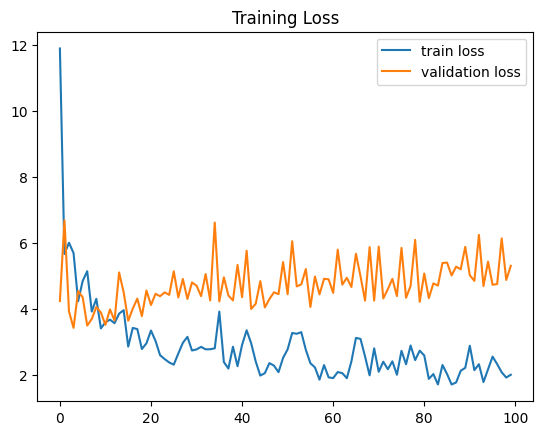

In [59]:
import matplotlib.pyplot as plt

plt.plot(epoch_train_loss)
plt.plot(epoch_val_loss)
plt.title("Training Loss")
plt.legend(["train loss", "validation loss"])

In [60]:
 # Test Loop
test_loss = 0.0

model.eval()
with torch.no_grad():
  for i, data in enumerate(test_loader):
    # Pegue a feature e o target do dataloader
    feature, target = data
    # Realize o foward pass
    pred = model(feature)
    # Calcule a loss e gradientes
    loss = criterion(pred, target)
    test_loss += loss.item()

    # Atualize os parametros
    optimizer.step()

avg_test_loss = test_loss / len(test_loader)
print(avg_test_loss)

4.374441623687744
